## Datei wurde zum erstellen der .pdf Dateien der Ergebnisse der Experimente benutzt

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pickle
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
np.set_printoptions(threshold=np.inf)

In [3]:
pickled_dfs = []
pickled_avg = []

In [4]:
pidfs = '../pickle/pickle_df_158_500.pkl'
with open(pidfs, 'rb') as pickle_file1:
    pickled_dfs = pickle.load(pickle_file1)

piavg = '../pickle/pickle_avg_158_500.pkl'
with open(piavg, 'rb') as pickle_file2:
    pickled_avg = pickle.load(pickle_file2)

In [5]:
methods = list(pickled_dfs[0])
delete_rows = ["feature1","feature1_nan","time","object_id", "InterpolateAkima", "InterpolateCubic", "InterpolatePoly5", "InterpolateQuadratic", "InterpolateLinear"]
for i in delete_rows:
    methods.remove(i)
counter = 0
div=0
plt_methods = []
plt_avg = []
    
for x in methods:
    for rating in pickled_avg:
        for y in rating:
            if y[0] == x:
                div += 1
                counter += y[1]
    print(x, counter/div)
    plt_methods.append(x)
    plt_avg.append(counter/div)
    counter=0
    div=0

mfcm 0.06699605563431854
ppa 0.055431742299356275
mfcm_nearest 0.0687820289580131
new_method_mean 0.056225871458324334
new_method_median 0.05708583710322865
new_method_mode 0.07551794337780143
mean_timestemp 0.17315400457371988
median_timestemp 0.1772539099682081
mean_timeseries 0.05176303718234788
median_timeseries 0.051910030341400556
fast_knn 0.09854888252665392
FillMean 0.17046163445796092
FillMedian 0.17088052020785915


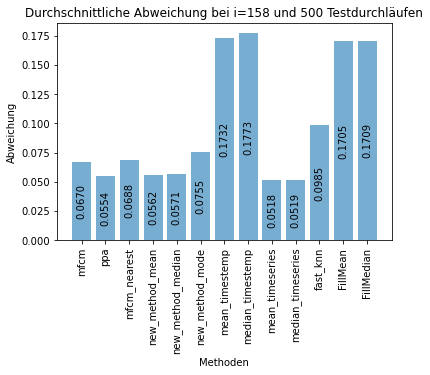

In [6]:
fig, ax = plt.subplots()

y_pos = np.arange(len(plt_methods))

plt.title('Durchschnittliche Abweichung bei i=158 und 500 Testdurchläufen')
plt.ylabel('Abweichung')
plt.xlabel("Methoden")

c_rects = plt.bar(y_pos, plt_avg, align='center', alpha=0.6)

def autolabel(rects):
# attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height/2,
            '%.4f' % float(height),
            ha='center', va='center', rotation='vertical')

autolabel(c_rects)

ax.set_xticks(range(len(plt_methods)))
ax.set_xticklabels(plt_methods, rotation='vertical')
plt.savefig('bar_mcar_i158.svg',bbox_inches='tight' )  
plt.show()